In [ ]:
!pip install --upgrade razdel

In [ ]:
!rm -f gazeta_raw.txt
!wget https://www.dropbox.com/s/4fxj5wmt7tjr5f2/gazeta_raw.txt
!rm -f gazeta_raw_new.jsonl
!wget https://www.dropbox.com/s/gyv841mph04qweu/gazeta_raw_new.jsonl

--2021-09-05 06:16:50--  https://www.dropbox.com/s/4fxj5wmt7tjr5f2/gazeta_raw.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4fxj5wmt7tjr5f2/gazeta_raw.txt [following]
--2021-09-05 06:16:50--  https://www.dropbox.com/s/raw/4fxj5wmt7tjr5f2/gazeta_raw.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd004a74d626fe15424c049748c.dl.dropboxusercontent.com/cd/0/inline/BVkPPUBZThB8aMKeben03itLp965itdZGbn3RKUCGqHpoSJZEHnidehlR7sTZv4oJeHrZ7Mzn8sDVC4mB5ZigA9nw_1gIwICT2BJwDVRh6xzwhpIUaqE-GL2aTR9YIdsyk7cwHFd19QQtalekTChBZ3e/file# [following]
--2021-09-05 06:16:51--  https://ucd004a74d626fe15424c049748c.dl.dropboxusercontent.com/cd/0/inline/BVkPPUBZThB8aMKeben03itLp965itdZGbn3RKUCGqHpoSJZEHnidehlR7sTZv4oJeHrZ7Mzn8sDVC4mB

In [ ]:
import json

records = []
with open("gazeta_raw.txt", "r") as r:
    for line in r:
        records.append(json.loads(line))
with open("gazeta_raw_new.jsonl", "r") as r:
    for line in r:
        records.append(json.loads(line))
records.sort(key=lambda x: x["date"])

In [ ]:
from razdel import tokenize

intersections = []
summary_words_counts = []
good_records = []
short_summaries_count = 0
long_summaries_count = 0
long_texts_count = 0
big_intersection_count = 0
small_intersection_count = 0
question_count = 0
bad_ending_count = 0
personal_count = 0
cinema_count = 0
bad_text_count = 0
bad_title_count = 0
bad_date_count = 0
travels_count = 0
editors_count = 0
lifestyle_count = 0
self_ref_count = 0
for i, record in enumerate(records):
    text = record["text"]
    if "summary" not in record or not record["summary"]:
        continue
    summary = record["summary"]
    title = record["title"]
    text_words = [word.text for word in tokenize(text)]
    summary_words = [word.text for word in tokenize(summary)]
    text_unique_words = set(text_words)
    summary_unique_words = set(summary_words)
    intersection =  len(summary_unique_words.intersection(text_unique_words)) / float(len(summary_unique_words))
    if i % 5000 == 1:
        print("Records count: ", i)
        print("Intersection part: ", sum(intersections)/len(intersections) if len(intersections) else 0)
        print("Short summaries count:", short_summaries_count)
        print("Long summaries count:", long_summaries_count)
        print("Long texts count:", long_texts_count)
        print("Big intersection count:", big_intersection_count)
        print("Small intersection count:", small_intersection_count)
        print("Question count:", question_count)
        print("Bad ending count:", bad_ending_count)
        print("Personal count:", personal_count)
        print("Cinema count:", cinema_count)
        print("Bad text count:", bad_text_count)
        print("Bad title count:", bad_title_count)
        print("Bad date count:", bad_date_count)
        print("Travels count:", travels_count)
        print("Lifestyle count: ", lifestyle_count)
        print("Editors count: ", editors_count)
        print("Self reference count: ", self_ref_count)
        print()
    if len(summary_words) < 15:
        short_summaries_count += 1
        continue
    if len(summary_words) > 85:
        long_summaries_count += 1
        continue
    if len(text_words) > 1500:
        long_texts_count += 1
        continue
    if intersection > 0.92:
        big_intersection_count += 1
        continue
    if intersection < 0.3:
        small_intersection_count += 1
        continue
    if "?" in summary and not "?»" in summary:
        question_count += 1
        continue
    if not (summary.endswith(".") or summary.endswith("!") or summary.endswith("»")):
        bad_ending_count += 1
        continue
    if "«личный опыт»" in text.lower():
        personal_count += 1
        continue
    if "путевых заметок" in text.lower() or "мы продолжаем серию" in text.lower():
        travels_count += 1
        continue
    if "В прокат" in summary:
        cinema_count += 1
        continue
    if "жизни»" in summary and "«Стил" in summary or "жизни»" in text and "«Стил" in text:
        lifestyle_count += 1
        continue
    if title.startswith("Как не") or title.startswith("Куда съездить") or title.startswith("Куда податься") or title.startswith("Куда поехать") or "!" in title:
        bad_title_count += 1
        continue
    if "http" in text or "Тел:" in text:
        bad_text_count += 1
        continue
    if record["date"] < "2010-06-01 00:00:00":
        bad_date_count += 1
        continue
    if "от редакции" in text.lower():
        editors_count += 1
        continue
    if "материале" in summary.lower() or "Газет" in summary:
        self_ref_count += 1
        continue
    intersections.append(intersection)
    summary_words_counts.append(len(summary_words))
    record.pop("topics", None)
    record.pop("edition", None)
    good_records.append(record)

Records count:  1
Intersection part:  0
Short summaries count: 0
Long summaries count: 0
Long texts count: 0
Big intersection count: 0
Small intersection count: 0
Question count: 1
Bad ending count: 0
Personal count: 0
Cinema count: 0
Bad text count: 0
Bad title count: 0
Bad date count: 0
Travels count: 0
Lifestyle count:  0
Editors count:  0
Self reference count:  0

Records count:  5001
Intersection part:  0.6274226223672419
Short summaries count: 54
Long summaries count: 42
Long texts count: 273
Big intersection count: 35
Small intersection count: 178
Question count: 130
Bad ending count: 40
Personal count: 306
Cinema count: 39
Bad text count: 108
Bad title count: 35
Bad date count: 3161
Travels count: 6
Lifestyle count:  1
Editors count:  0
Self reference count:  0

Records count:  10001
Intersection part:  0.6185009220221531
Short summaries count: 73
Long summaries count: 68
Long texts count: 377
Big intersection count: 61
Small intersection count: 229
Question count: 154
Bad endi

In [ ]:
good_records.sort(key=lambda x: x["date"])

In [ ]:
test_records = [r for r in good_records if r["date"] > '2019-10-01' and r["date"] < '2020-03-24']
len(test_records)

5767

In [ ]:
from collections import Counter
Counter([r["url"].split("/")[3] for r in test_records]).most_common()

[('social', 1233),
 ('politics', 1098),
 ('business', 931),
 ('army', 756),
 ('culture', 676),
 ('science', 304),
 ('sport', 275),
 ('tech', 234),
 ('lifestyle', 183),
 ('auto', 68),
 ('comments', 9)]

In [ ]:
new_records = [r for r in good_records if r["date"] >= '2020-03-24']
len(new_records)

10714

In [ ]:
new_records[-1]

{'authors': ['Михаил Котляр'],
 'date': '2021-09-03 11:50:27',
 'summary': 'Токио пока не дал гарантий Москве, что не станет размещать на своей территории американские ракеты, заявил Владимир Путин. Это, по его словам, препятствует заключению мирного соглашения с Японией. Его отсутствие президент назвал нонсенсом.',
 'text': 'Москва никогда не отказывалась обсуждать с Токио мирный договор, который так и не был заключен между двумя странами по итогам Второй мировой войны. Об этом заявил президент Владимир Путин на пленарном заседании Восточного экономического форума (ВЭФ). Трансляцию ведет телеканал «Россия 24». «Считаю, что отсутствие такого документа в наших отношениях — это нонсенс. Мы всегда говорили, что нужно уважать закрепленные в международных документах результаты Второй мировой войны. И мы никогда не отказываемся от диалога по мирному договору», — сказал глава государства. Он добавил, что принятая в прошлом году поправка к Конституции о неделимости российской территории и прин

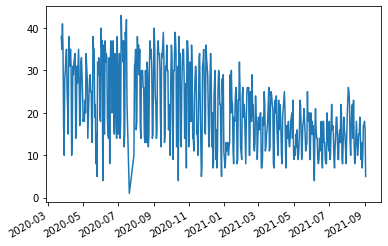

In [ ]:
import pandas as pd
dates = [r["date"].split(" ")[0] for r in new_records]
df = pd.DataFrame({'date': pd.to_datetime(dates)})
s = df['date'].value_counts().sort_index()
s.plot()

In [ ]:
from collections import Counter
Counter([r["url"].split("/")[3] for r in new_records]).most_common()

[('politics', 2668),
 ('social', 2324),
 ('business', 1394),
 ('culture', 1335),
 ('science', 1101),
 ('army', 1035),
 ('tech', 698),
 ('auto', 133),
 ('economics', 22),
 ('sport', 3),
 ('comments', 1)]

In [ ]:
import json

with open("gazeta_new.jsonl", "w") as w:
    for r in new_records:
        r = {
             "date": r["date"],
             "url": r["url"],
             "summary": r["summary"],
             "title": r["title"],
             "text": r["text"]
        }
        w.write(json.dumps(r, ensure_ascii=False) + "\n")

In [ ]:
import json

with open("gazeta_all.jsonl", "w") as w:
    for r in good_records:
        r = {
             "date": r["date"],
             "url": r["url"],
             "summary": r["summary"],
             "title": r["title"],
             "text": r["text"]
        }
        w.write(json.dumps(r, ensure_ascii=False) + "\n")

In [ ]:
import sys
import json

with open("gazeta_all.jsonl") as r, open("gazeta_train.jsonl", "w") as train, open("gazeta_val.jsonl", "w") as val, open("gazeta_test.jsonl", "w") as test:
    used_urls = set()
    train_records = []
    val_records = []
    test_records = []
    for line in r:
        record = json.loads(line)
        if record["url"] in used_urls:
            continue
        used_urls.add(record["url"])
        if record["date"] < "2020-01-01":
            f = train_records
        elif record["date"] < "2020-09-01":
            f = val_records
        else:
            f = test_records
        f.append(record)
    train_records.sort(key=lambda x: x.get("date"))
    val_records.sort(key=lambda x: x.get("date"))
    test_records.sort(key=lambda x: x.get("date"))
    for r in train_records:
        train.write(json.dumps(r, ensure_ascii=False) + "\n")
    for r in val_records:
        val.write(json.dumps(r, ensure_ascii=False) + "\n")
    for r in test_records:
        test.write(json.dumps(r, ensure_ascii=False) + "\n")

In [ ]:
!cat gazeta_train.jsonl | wc -l
!cat gazeta_val.jsonl | wc -l
!cat gazeta_test.jsonl | wc -l

60964
6369
6793


In [ ]:
!tar -czvf gazeta_jsonl_v2.tar.gz gazeta_train.jsonl gazeta_val.jsonl gazeta_test.jsonl

gazeta_train.jsonl
gazeta_val.jsonl
gazeta_test.jsonl
